In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-default-dataset/Loan_Default.csv


In [2]:
df = pd.read_csv(os.path.join(dirname, filename))

In [3]:
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [52]:
columns = ['Gender', 'loan_type', 'loan_amount', 'income', 'credit_type', 'Credit_Score', 'age', 'occupancy_type']

columns = ['loan_amount', 'income', 'Credit_Score', 'age']

df[columns]

,loan_amount,income,Credit_Score,age
0,116500,1740.0,758,25-34
1,206500,4980.0,552,55-64
2,406500,9480.0,834,35-44
3,456500,11880.0,587,45-54
4,696500,10440.0,602,25-34
...,...,...,...,...
148665,436500,7860.0,659,55-64
148666,586500,7140.0,569,25-34
148667,446500,6900.0,702,45-54
148668,196500,7140.0,737,55-64


In [5]:
for col in df.columns:
    print(col)

ID
year
loan_limit
Gender
approv_in_adv
loan_type
loan_purpose
Credit_Worthiness
open_credit
business_or_commercial
loan_amount
rate_of_interest
Interest_rate_spread
Upfront_charges
term
Neg_ammortization
interest_only
lump_sum_payment
property_value
construction_type
occupancy_type
Secured_by
total_units
income
credit_type
Credit_Score
co-applicant_credit_type
age
submission_of_application
LTV
Region
Security_Type
Status
dtir1


In [17]:
df[columns].nunique()

Gender               4
loan_type            3
loan_amount        211
income            1001
credit_type          4
Credit_Score       401
age                  7
occupancy_type       3
dtype: int64

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, LabelEncoder

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [54]:
lb = LabelEncoder()
df_encoding = df[columns].copy()
df_encoding['age'] = lb.fit_transform(df_encoding[['age']])
df_encoding

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,loan_amount,income,Credit_Score,age
0,116500,1740.0,758,0
1,206500,4980.0,552,3
2,406500,9480.0,834,1
3,456500,11880.0,587,2
4,696500,10440.0,602,0
...,...,...,...,...
148665,436500,7860.0,659,3
148666,586500,7140.0,569,0
148667,446500,6900.0,702,2
148668,196500,7140.0,737,3


In [40]:
df_encoding = pd.get_dummies(df[columns], columns=['age'])
df_encoding

,loan_amount,income,Credit_Score,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,116500,1740.0,758,1,0,0,0,0,0,0
1,206500,4980.0,552,0,0,0,1,0,0,0
2,406500,9480.0,834,0,1,0,0,0,0,0
3,456500,11880.0,587,0,0,1,0,0,0,0
4,696500,10440.0,602,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
148665,436500,7860.0,659,0,0,0,1,0,0,0
148666,586500,7140.0,569,1,0,0,0,0,0,0
148667,446500,6900.0,702,0,0,1,0,0,0,0
148668,196500,7140.0,737,0,0,0,1,0,0,0


In [20]:
df_encoding.describe()

,loan_amount,income,Credit_Score,Gender_Female,Gender_Joint,Gender_Male,Gender_Sex Not Available,loan_type_type1,loan_type_type2,loan_type_type3,...,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,occupancy_type_ir,occupancy_type_pr,occupancy_type_sr
count,1.486700e+05,139520.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,...,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000
mean,3.311177e+05,6957.338876,699.789103,0.183399,0.278462,0.284832,0.253306,0.761236,0.139652,0.099112,...,0.128755,0.220744,0.233537,0.218834,0.139531,0.008993,0.048261,0.049371,0.929582,0.021047
std,1.839093e+05,6496.586382,115.875857,0.386995,0.448244,0.451336,0.434906,0.426329,0.346626,0.298814,...,0.334930,0.414750,0.423083,0.413457,0.346500,0.094405,0.214318,0.216642,0.255851,0.143540
min,1.650000e+04,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.965000e+05,3720.000000,599.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.965000e+05,5760.000000,699.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.365000e+05,8520.000000,800.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.576500e+06,578580.000000,900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df_encoding.dtypes

loan_amount                   int64
income                      float64
Credit_Score                  int64
Gender_Female                 uint8
Gender_Joint                  uint8
Gender_Male                   uint8
Gender_Sex Not Available      uint8
loan_type_type1               uint8
loan_type_type2               uint8
loan_type_type3               uint8
credit_type_CIB               uint8
credit_type_CRIF              uint8
credit_type_EQUI              uint8
credit_type_EXP               uint8
age_25-34                     uint8
age_35-44                     uint8
age_45-54                     uint8
age_55-64                     uint8
age_65-74                     uint8
age_<25                       uint8
age_>74                       uint8
occupancy_type_ir             uint8
occupancy_type_pr             uint8
occupancy_type_sr             uint8
dtype: object

In [23]:
df_encoding.isna().sum()

loan_amount                    0
income                      9150
Credit_Score                   0
Gender_Female                  0
Gender_Joint                   0
Gender_Male                    0
Gender_Sex Not Available       0
loan_type_type1                0
loan_type_type2                0
loan_type_type3                0
credit_type_CIB                0
credit_type_CRIF               0
credit_type_EQUI               0
credit_type_EXP                0
age_25-34                      0
age_35-44                      0
age_45-54                      0
age_55-64                      0
age_65-74                      0
age_<25                        0
age_>74                        0
occupancy_type_ir              0
occupancy_type_pr              0
occupancy_type_sr              0
dtype: int64

In [55]:
df_encoding.dropna(inplace=True)

In [56]:
df_encoding['income'] = df_encoding['income'].astype('int')

In [57]:
normalizer = Normalizer()
data_normalizer = normalizer.fit_transform(df_encoding)
df_normalizer = pd.DataFrame(data_normalizer)
df_normalizer

,0,1,2,3
0,0.999867,0.014934,0.006506,0.000000
1,0.999706,0.024109,0.002672,0.000015
2,0.999726,0.023315,0.002051,0.000002
3,0.999661,0.026015,0.001285,0.000004
4,0.999887,0.014988,0.000864,0.000000
...,...,...,...,...
139515,0.999837,0.018004,0.001509,0.000007
139516,0.999925,0.012173,0.000970,0.000000
139517,0.999879,0.015452,0.001572,0.000004
139518,0.999333,0.036312,0.003748,0.000015


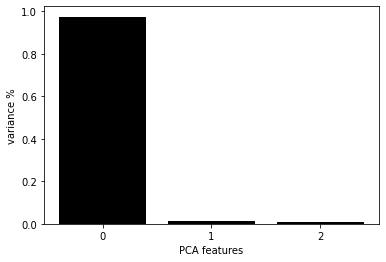

In [58]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_normalizer)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

In [169]:
from sklearn.cluster import DBSCAN

class Clustering:
    
    def __init__(self, data: pd.DataFrame, range_n_clusters: list):
        self.X = data
        self.range_n_clusters = range_n_clusters
        self.n_clusters = None
        self.centers = None
        self.cluster_labels = None
        self.silhouette_avg = None
        self.sample_silhouette_values = None

    def start(self, type_method='kmeans'):
        if type_method == 'kmeans':
            for self.n_clusters in self.range_n_clusters:
                self.handle_kmeans()
                self.handle_silhouettes()
                self.handle_plot()
                
        else:
            self.handle_dbscan()
        self.handle_silhouettes()
        self.handle_plot()
        plt.show()
        
    def handle_kmeans(self):
        clusterer = KMeans(n_clusters=self.n_clusters, n_init=10, random_state=10)
        self.cluster_labels = clusterer.fit_predict(self.X)
        self.centers = clusterer.cluster_centers_
        
    def handle_dbscan(self):
        clusterer = DBSCAN(eps=0.1, min_samples=5)
        self.cluster_labels = clusterer.fit_predict(self.X)
        serie_labels = pd.Series(labels)
        index = []
        for label in serie_labels.unique():
            index.append(serie_labels[serie_labels == label].index.tolist()[0])
        self.centers = db.components_[index]
        self.n_clusters = serie_labels.nunique()
        
    def handle_silhouettes(self):
        self.silhouette_avg = silhouette_score(self.X, self.cluster_labels)
        print(
            "For n_clusters =",
            self.n_clusters,
            "The average silhouette_score is :",
            self.silhouette_avg,
        )

        self.sample_silhouette_values = silhouette_samples(self.X, self.cluster_labels)
    
    def handle_plot(self):
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(self.X) + (self.n_clusters + 1) * 10])
        y_lower = 10
        for i in range(self.n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = self.sample_silhouette_values[self.cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / self.n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=self.silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        colors = cm.nipy_spectral(self.cluster_labels.astype(float) / self.n_clusters)
        ax2.scatter(
            # X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
            X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )
        
        ax2.scatter(
            self.centers[:, 0],
            self.centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )
        for i, c in enumerate(self.centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % self.n_clusters,
            fontsize=14,
            fontweight="bold",
        )
        

For n_clusters = 2 The average silhouette_score is : 0.7990982043318722
For n_clusters = 3 The average silhouette_score is : 0.6646087953013825
For n_clusters = 4 The average silhouette_score is : 0.6273723685927498
For n_clusters = 4 The average silhouette_score is : 0.6273723685927498


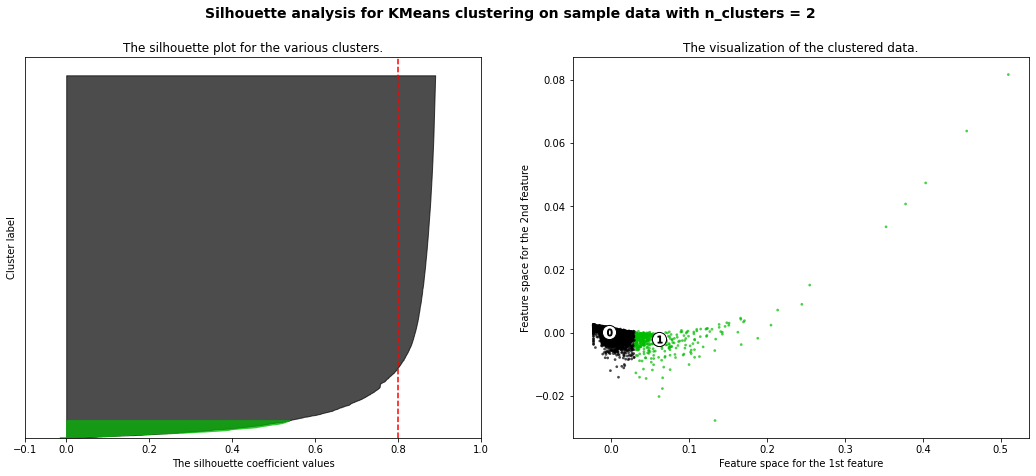

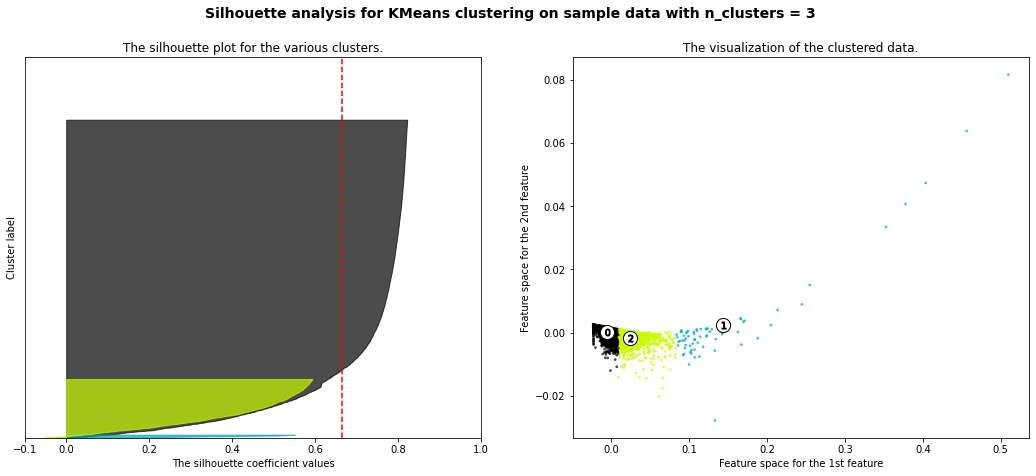

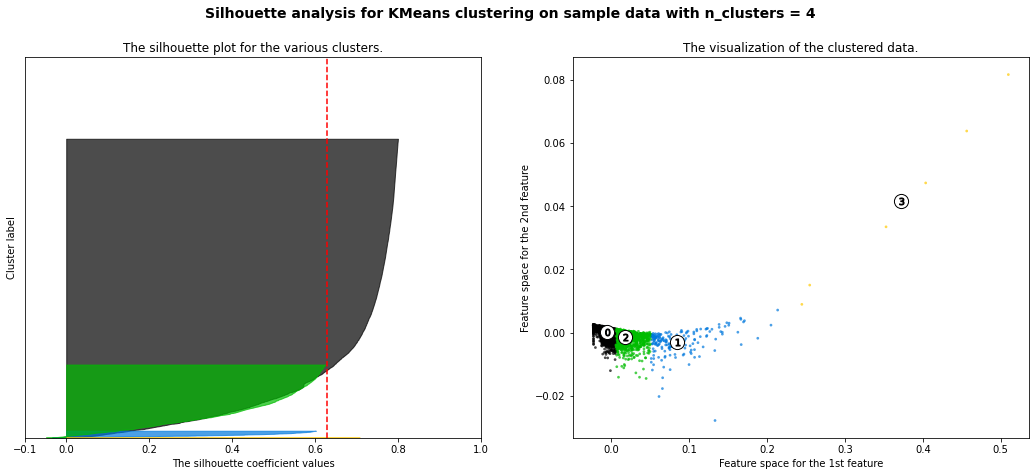

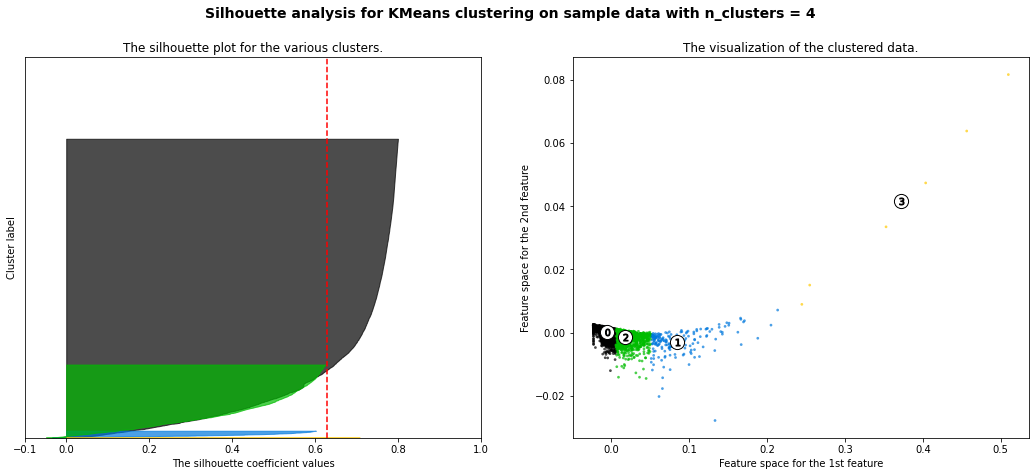

In [170]:
Clustering(X, range_n_clusters).start()

For n_clusters = 2 The average silhouette_score is : 0.9629840509581971


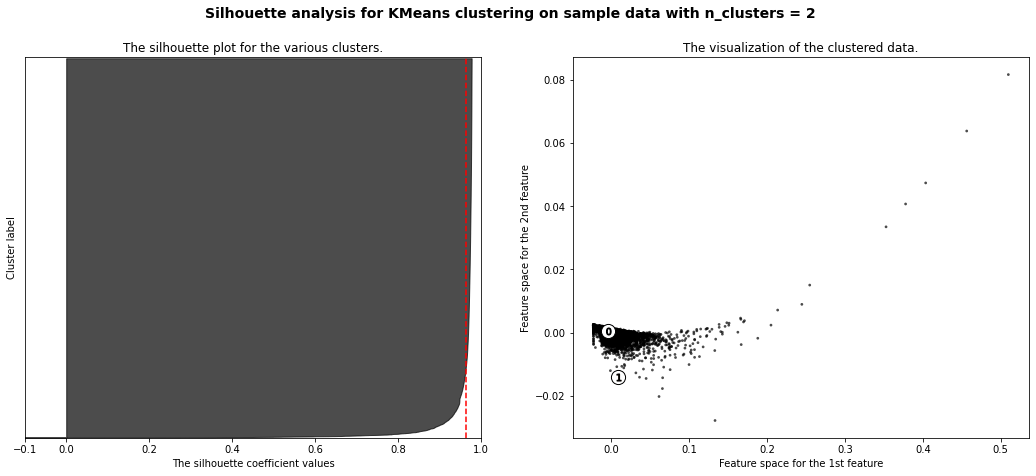

In [171]:
Clustering(X, range_n_clusters).start(type_method='dbscan')

2 - Compare os dois resultados, aponte as semelhanças e diferenças e interprete.
> Kmeans utiliza a técnica do centroid, classifica os pontos de acordo com sua proximidade ao ponto central mais perto. É necessário atribuir o número de cluster manualmente.
> Dbscan utiliza técnica de agrupar pontos próximos, com uma distância máxima de classificação predefinida. Encontrando assim o número de cluster de forma automática.

3 - Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.
> Necessário escolher as medidas

4 - Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?
> Não, pois no algoritmo do Dbscan o número de cluster é definido automaticamente de acordo com a distância dos pontos.